Your group of friends has planned a meal where each of you has to bring a dish.
 You would like to bring a tortilla, but you have recently moved into your new apartment and all your things are scattered across different rooms.
 You are about to search for everything you need to make the tortilla, but you don’t have much time!
 You must find the missing utensils and ingredients in three minutes.
 Good luck!


You are now in bedroom
You examine suitcase. You find spatula.
You are now in bedroom
You examine door a. You can keep looking in the next room.
You are now in bedroom
You examine door a. You can keep looking in the next room.
You are now in living room
This object does not exist in the current room
You are now in living room
You examine plastic box. You find bowl.
You are now in living room
You examine door b. You can keep looking in the next room.
You are now in bathroom
You examine big box. You find frying pan.
You are now in bathroom
You examine door b. You can keep looking in 

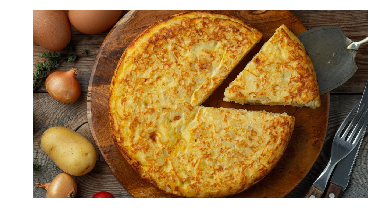

... with onion!!!!!


In [1]:
import threading
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import time

class BombExploded(Exception):
    pass

# Initialize the game_over flag
game_over = False

# Define a function to handle the timer
def timer():
    time.sleep(180)  # Wait for 3 minutes (180 seconds)
    global game_over
    game_over = True

# Start the timer thread
timer_thread = threading.Thread(target=timer)
timer_thread.start()

bedroom = {
    "name": "bedroom",
    "type": "room",
}

door_a = {
    "name": "door a",
    "type": "door",
}

bed = {
    "name": "bed",
    "type": "furniture",
}

suitcase = {
    "name": "suitcase",
    "type": "furniture",
}

dresser = {
    "name": "dresser",
    "type": "furniture",
}

little_box = {
    "name": "little box",
    "type": "furniture",
}

spatula = {
    "name": "spatula",
    "type": "utensil",
    "target": door_a,
}

living_room = {
    "name": "living room",
    "type": "room",
}

door_b = {
    "name": "door b",
    "type": "door",
}

couch = {
    "name": "couch",
    "type": "furniture",
}

table = {
    "name": "table",
    "type": "furniture",
}

plastic_box = {
    "name": "plastic box",
    "type": "furniture",
}

bowl = {
    "name": "bowl",
    "type": "utensil",
    "target": door_b,
}

bathroom = {
    "name": "bathroom",
    "type": "room",
}

door_c = {
    "name": "door c",
    "type": "door",
}

shower = {
    "name": "shower",
    "type": "furniture",
}

big_box = {
    "name": "big box",
    "type": "furniture",
}

frying_pan = {
    "name": "frying pan",
    "type": "utensil",
    "target": door_c,
}

kitchen = {
    "name": "kitchen",
    "type": "room",
}

cupboard = {
    "name": "cupboard",
    "type": "furniture",
}


pantry = {
    "name": "pantry",
    "type": "room",
}


shelves = {
    "name": "shelves",
    "type": "furniture",
}

door_d = {
    "name": "door d",
    "type": "door",
}

potatoes = {
    "name": "potatoes",
    "type": "utensil",
    "target": door_d,
}



all_rooms = [bedroom, living_room, bathroom, kitchen, pantry]

all_doors = [door_a, door_b, door_c, door_d]

# define which items/rooms are related

object_relations = {
    "bedroom": [bed, suitcase, dresser, little_box, door_a],
    "suitcase": [spatula],
    "little box": [],
    "bed": [],
    "dresser": [],
    "door a": [bedroom, living_room],
    "living room": [couch, table, plastic_box, door_b, door_c, door_d, door_a],
    "plastic box": [bowl],
    "bowl": [door_b],
    "couch": [],
    "table": [],
    "door b": [living_room, bathroom],
    "door c": [living_room, pantry],
    "door d": [living_room, kitchen],
    "bathroom": [big_box, shower, door_b],
    "big box": [frying_pan],
    "frying_pan": [door_c],
    "shower": [],
    "kitchen": [door_d],
    "pantry": [cupboard, shelves, door_c],
    "cupboard": [potatoes],
    "potatoes": [door_d],
    "shelves": [],
}

# define game state. Do not directly change this dict.
# Instead, when a new game starts, make a copy of this
# dict and use the copy to store gameplay state. This
# way you can replay the game multiple times.


INIT_GAME_STATE = {
    "current_room": bedroom,
    "utensils_collected": [],
    "target_room": kitchen,
}

def linebreak():
    """Print a line break"""
    print("\n\n")

def start_game():
    try:
      """Start the game"""
      print("Your group of friends has planned a meal where each of you has to bring a dish.\n You would like to bring a tortilla, but you have recently moved into your new apartment and all your things are scattered across different rooms.\n You are about to search for everything you need to make the tortilla, but you don’t have much time!\n You must find the missing utensils and ingredients in three minutes.\n Good luck!\n\n")
      play_room(game_state["current_room"])
    except SystemExit:
      print('... with onion!!!!!')
def play_room(room):
    """Play a room. First check if the room being played is the target room."""
    if game_over:
        raise BombExploded()

    game_state["current_room"] = room
    if game_state["current_room"] == game_state["target_room"]:
        display_image()
        raise SystemExit('... with onion!!!!!')
        #print("Congrats! You escaped the room!")

        #exit()  # Exit after winning

    print("You are now in " + room["name"])

    intended_action = input("What would you like to do? Type 'explore' or 'examine'?\n").strip()
    if intended_action == "explore":
        explore_room(room)
        play_room(room)
    elif intended_action == "examine":
        examine_item(input("What would you like to examine?\n").strip())
        play_room(room)
    else:
        print("Not sure what you mean. Type 'explore' or 'examine'.\nHINT! You should explore a room first and then you can examine the objects in it. The utensils are hidden in the different objects.\n")
        play_room(room)
    linebreak()

def explore_room(room):
    """Explore a room. List all items belonging to this room."""
    if game_over:
        return  # Do nothing if game is over

    items = [i["name"] for i in object_relations[room["name"]]]
    print("You explore the room. This is " + room["name"] + ". You find " + ", ".join(items))

def get_next_room_of_door(door, current_room):
    """From object_relations, find the two rooms connected to the given door."""
    connected_rooms = object_relations[door["name"]]

    #for room in connected_rooms:
    #    if not current_room == room:
    #        return room

    room = next(room for room in connected_rooms if room != current_room)
    return room

def examine_item(item_name):
    """
    Examine an item which can be a door or furniture.
    First make sure the intended item belongs to the current room.
    Then check if the item is a door. Tell player if utensils hasn't been
    collected yet. Otherwise ask player if they want to go to the next
    room. If the item is not a door, then check if it contains utensils.
    Collect the utensils if found and update the game state. At the end,
    play either the current or the next room depending on the game state
    to keep playing.
    """
    current_room = game_state["current_room"]
    next_room = None  # Initialize next_room

    try:
        item = next(i for i in object_relations[current_room["name"]] if i["name"] == item_name)
    except StopIteration:
        print("This object does not exist in the current room")
        return

    output = "You examine " + item_name + ". "
    if item["type"] == "door":
        have_utensil = any(utensil["target"] == item for utensil in game_state["utensils_collected"])
        if have_utensil:
            output += "You can keep looking in the next room."
            next_room = get_next_room_of_door(item, current_room)
        else:
            output += "You should find an utensil in the current room."
    else:
        if len(object_relations[item_name]) > 0:
            item_found = object_relations[item_name].pop(0)
            game_state["utensils_collected"].append(item_found)
            output += "You find " + item_found["name"] + "."
        else:
            output += "There isn't anything interesting about it."

    print(output)

    if next_room and input("Do you want to go to the next room? Enter 'yes' or 'no'\n").strip().lower() == 'yes':
        play_room(next_room)
    else:
        play_room(current_room)

def display_image(url="https://s2.abcstatics.com/media/bienestar/2020/05/22/tortilla-patatas-kSVD--1248x698@abc.jpeg"):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(np.array(img))  # Convert the image to a NumPy array using np.array(img)
    plt.axis('off')
    plt.show()

game_state = INIT_GAME_STATE.copy()

try:
    start_game()
except BombExploded:
    print("La gente ha llegado! No tenemos más tiempo!")